<h1>3 &nbsp; Métodos numéricos - Euler, Euler modificado e RK4 </h1>
<h2>3.1 &nbsp; O método de Euler</h2>
&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys
sys.path.insert(0, '../python')

Escrevendo arquivo contendo a função <b>f(&LT;população>)</b> contendo o modelo matemático do fenômeno

In [3]:
%%writefile ../python/f_verhulst.py
def f_verhulst(P):
    L = 300000
    k = 0.01553891418938226
    return  (k*(1-P/L))*P

Overwriting ../python/f_verhulst.py


Importando a função <b>sol_euler</b>

In [4]:
from sol_euler import sol_euler

&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [5]:
#Passo de derivação
h = 0.001

#Condição inicial
P0 = 186488

#tempo inicial
ti = 0

#tempo final
tf = 21

#Intervalo de 10 à 21 anos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_euler</b>:

In [6]:
P = sol_euler(vt,P0,'verhulst')
print(P)
print('O vetor de temperaturas tem {} elementos'.format(P.shape[0]))

[186488.         186489.0964582  186490.19291226 ... 208444.64308515
 208445.63157886 208446.62006659]
O vetor de temperaturas tem 21000 elementos


Exibindo o gráfico <b>vt</b> $\times$ <b>P</b>:

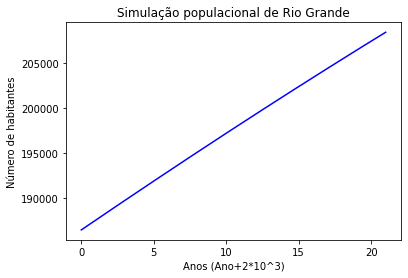

In [7]:
plt.plot(vt,P,'b',label='Euler')
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()